# Regressão de Lasso

In [31]:
#Importar todas as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [32]:
#Definir o número de exemplos
M = 100

#Os valores aleatórios gerados serão os mesmos, os resultados poderão ser reproduzidos.
np.random.seed(42)

#As features são criadas, como vetor colune de M linhas, com valores entre -3 e 3. Também crio o ruído
x = np.random.uniform(-3, 3, (M,1))
n = np.random.normal(0, 1, (M, 1))

#A função target é criada sem e com ruído (y e y_noisy)
y = 2 + 1*x + 0.5*x*x
y_noisy = y + n

#Criar os vetores de treinamento e de validação (70% treinamento e 30% validação)
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.3, random_state=10)

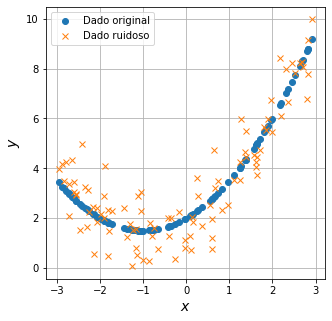

In [33]:
#Gráfico mostrando função objetivo e versão ruidosa
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'o', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [34]:
#Defino a ordem do polinômio
model_order = 90

In [35]:
#Crio vetor de 1000 lambdas variando de 1e^-10 e 1000
lambdas = np.linspace (10**-10, 1, 1000)

In [36]:
#Bias desabilitado
include_bias = True

#Criar vetores para armazenar os valores dos erros de treinamento e validação
error_train = []
error_val = []

minimum_error_val = float("inf")
minimum_val_error_lambda = None
best_iteration = None
best_model = None

#Loop será executado o #lambdas vezes, de acordo com o vetor informado acima.
for i in range(0,len(lambdas)):

    #Instancio o polinômio
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
   
    #Habilito o escalonamento de features
    std_scaler = StandardScaler()
    
    #Habilito a regressão de LASSO para os lambdas informados
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    
    #Criar o fluxo de ações a serem executadas (criar polinômio, escalonar as features e executar a regularização)
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    
    #O modelo é treinado utilizando a função target 'original' com ruído
    model.fit(x_train, y_train)
    
    #Utilizar o modelo treinado pra fazer predições utilizando o conjunto de validação (erro de validação)
    y_val_regul = model.predict(x_val)
    
    #Utilizar o modelo treinado para fazer predições utilizando o conjunto de treinamento (erro de treinamento)
    y_train_regul = model.predict(x_train)
    
    #Calcular os erros de validação e treinamento, considerando o erro médio entre os valores obtidos
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_regul)))
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_regul)))
    
    #Armazeno o menor valor de erro, o ótimo valor de lambda, a melhor iteração e o melhor modelo
    if error_val[i] < minimum_error_val:
        minimum_error_val = error_val[i]
        minimum_error_val_lambda = lambdas[i]
        best_iteration = i
        best_model = clone(model)

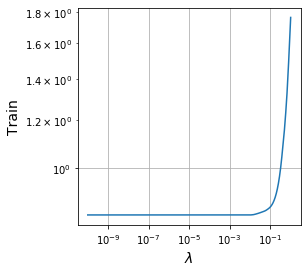

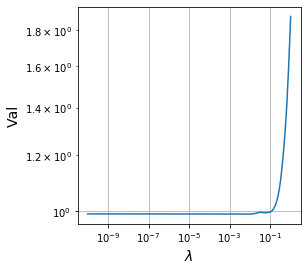

In [37]:
#configuro o gráfico a ser exibido (lambda vs. erro)
fig = plt.figure(figsize=(4,4))
plt.plot(lambdas, error_train)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('Train', fontsize=14)
plt.grid()

fig = plt.figure(figsize=(4,4))
plt.plot(lambdas, error_val)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('Val', fontsize=14)
plt.grid()

In [38]:
#Menor erro de validação e valor ótimo de lambda
print('Menor erro de validação = ', minimum_error_val)
print('Valor ótimo de lambda = ',  minimum_error_val_lambda)

Menor erro de validação =  0.9908301116932576
Valor ótimo de lambda =  0.006006006105405405


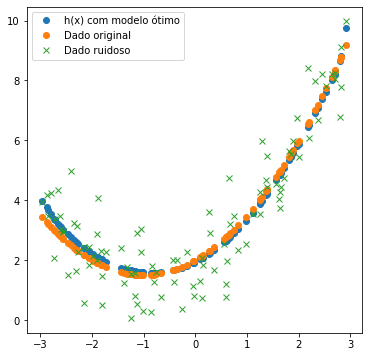

In [39]:
#Utilizo o modelo ótimo para criar gráfico que mostra função hipótese
best_model.fit(x_train, y_train)
yhat = best_model.predict(x)


fig = plt.figure(figsize=(6,6))
plt.plot(x, yhat, 'o', label='h(x) com modelo ótimo')
plt.plot(x, y, 'o', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.legend()

In [40]:
#Pesos obtidos durante o treinamento

best_lasso_weights = best_model.named_steps.reg.coef_

In [41]:
print('Pesos encontrados durante o treinamento do modelo com o menor erro de validação')
print(best_lasso_weights)

Pesos encontrados durante o treinamento do modelo com o menor erro de validação
[ 0.00000000e+00  1.53841974e+00  1.48143972e+00  1.49739040e-01
 -1.76558778e-02 -3.49748810e-02 -2.00484289e-02 -3.59624617e-02
 -1.35042345e-02 -2.29119476e-02 -2.16282893e-03 -1.27972285e-02
 -0.00000000e+00 -7.03612858e-03 -0.00000000e+00 -3.34198302e-03
  6.32438432e-05 -1.69260393e-03  9.45834281e-03 -0.00000000e+00
  9.13386047e-03 -0.00000000e+00  8.15015564e-03  0.00000000e+00
  7.13881594e-03  0.00000000e+00  6.15928640e-03  5.28178020e-03
  7.50358009e-03  7.17980724e-03  7.69003388e-03  7.42354631e-03
  7.27645256e-03  7.31272713e-03  6.77638590e-03  7.08486232e-03
  6.28104224e-03  6.79948567e-03  5.80818822e-03  6.48020210e-03
  5.36101171e-03  6.14059512e-03  4.93927697e-03  5.78993341e-03
  4.54177120e-03  5.43489197e-03  4.16695954e-03  5.08032347e-03
  3.81320900e-03  4.72972443e-03  3.47888401e-03  4.38556130e-03
  3.16239321e-03  4.04951256e-03  2.86221343e-03  3.72265308e-03
  2.576901

In [42]:
'''
Ao utilizar a regressão de LASSO, observa que realmente há um maior número de pesos de valor nulo. Isso comprova a
teoria de que tal regressão realiza a seleção de variáveis, zerando as que possuem menos influência no resultado 
final.
'''

'\nAo utilizar a regressão de LASSO, observa que realmente há um maior número de pesos de valor nulo. Isso comprova a\nteoria de que tal regressão realiza a seleção de variáveis, zerando as que possuem menos influência no resultado \nfinal.\n'